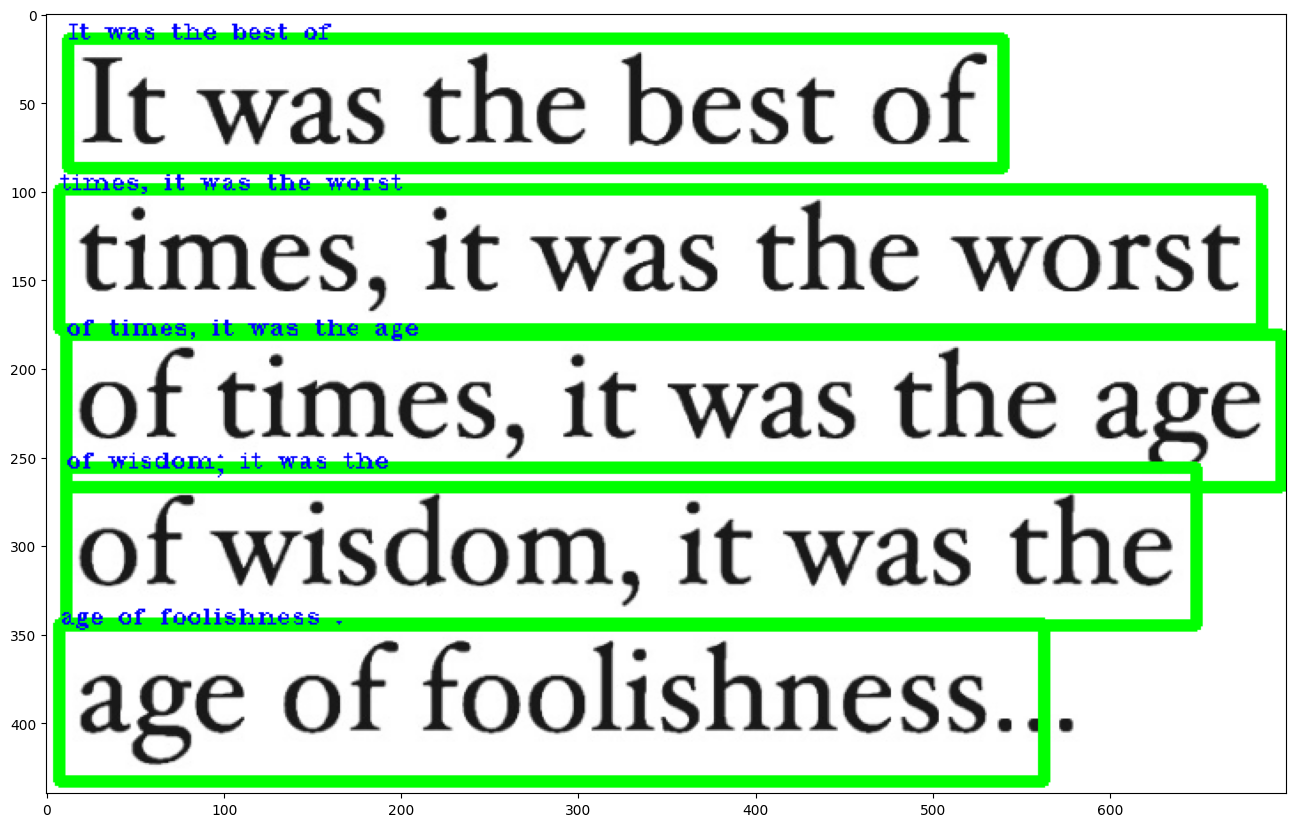

In [5]:
# Importing necessary libraries
import cv2
import easyocr
import matplotlib.pyplot as plt

# Define utility function to draw bounding boxes around detected text and display the image
def draw_bounding_boxes(image, detections, threshold=0.25):
    for bbox, text, score in detections:
        if score > threshold:
            cv2.rectangle(image, tuple(map(int, bbox[0])), tuple(map(int, bbox[2])), (0, 255, 0), 5)
            cv2.putText(image, text, tuple(map(int, bbox[0])), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.65, (255, 0, 0), 1)

# Load the input image
image_path = "/content/img.png"
img = cv2.imread(image_path)
if img is None:
    raise ValueError("Error loading the image. Please check the file path.")

# Instantiate the EasyOCR reader to detect English text and disable GPU for CPU usage
reader = easyocr.Reader(['en'], gpu=False)

# Run text detection on the image using EasyOCR
text_detections = reader.readtext(img)

# Set a score threshold to filter weak detections
threshold = 0.25

# Draw bounding boxes and annotate the image with text detections
draw_bounding_boxes(img, text_detections, threshold)

# Display the annotated image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGBA))
plt.show()
